In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#  Load Pre_Cleaned Data

In [2]:
df = pd.read_csv('Data/food sales.csv')
display(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


None

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052


# Story of Understanding the properties of products and outlets that play crucial roles in increasing sales.

## Q1: How food type and fat type impact the sales?



In [3]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [4]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [5]:
rename_map = {"Fruits and Vegetables":"Fru&Veg","Snack Foods":"Snack", "Frozen Foods":"Frozen", "Baking Goods":"Baking", "Health and Hygiene":"Health",
             "Starchy Foods":"Starchy"}
df['Item_Type'] = df['Item_Type'].replace(rename_map)

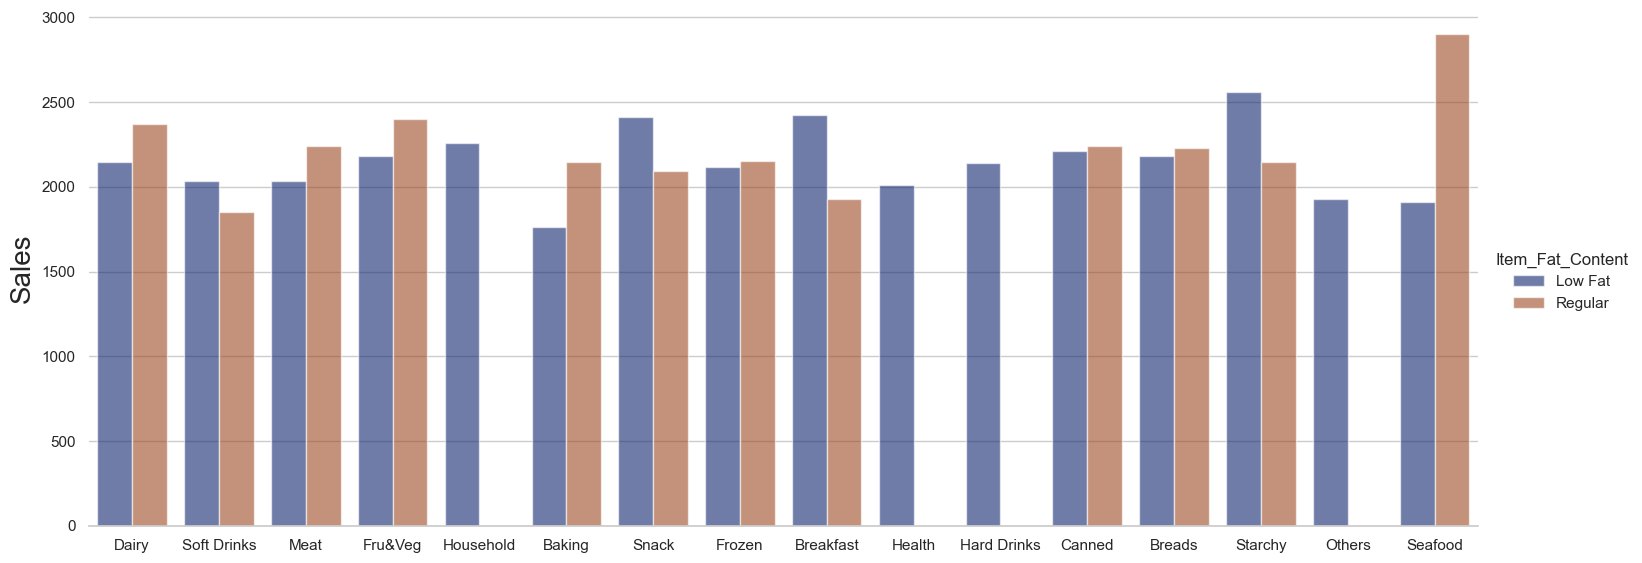

In [7]:

sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="Item_Type", y="Item_Outlet_Sales", hue="Item_Fat_Content",
    palette="dark", alpha=.6, height=6, aspect=20/8, ci=None
)
g.despine(left=True)
g.set_axis_labels("", "Sales", fontsize=20)



plt.savefig('products property.png', dpi = 300)


## Does Outlet Type makes big difference in Sales?

In [11]:
outlet_type_sale = df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().round(0)
outlet_type_sale

Outlet_Type
Grocery Store         340.0
Supermarket Type1    2316.0
Supermarket Type2    1995.0
Supermarket Type3    3694.0
Name: Item_Outlet_Sales, dtype: float64

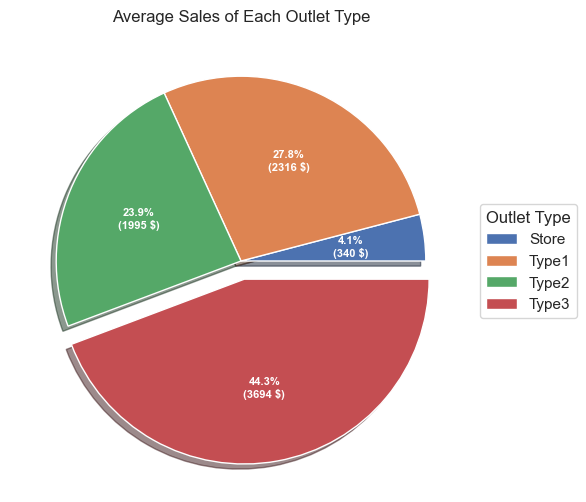

In [24]:
fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(aspect="equal"))

outlet_type_sales = ["340.0 $ Grocery Store",
          "2316.0 $ Supermarket Type1",
          "1995.0 $ Supermarket Type2",
          "3694.0 $ Supermarket Type3"]

data = [float(x.split()[0]) for x in outlet_type_sales]
outlet_type = [x.split()[-1] for x in outlet_type_sales]

explode = [0, 0, 0, 0.1]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return "{:.1f}%\n({:d} $)".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), shadow=True, explode=explode)

ax.legend(wedges, ingredients,
          title="Outlet Type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title("Average Sales of Each Outlet Type")

plt.show()